# Lecture 5 - Visualization, Part I

## Why visualize?

- Tables can be hard to interpret.
- We hope to spot trends through visualization.
- Many types: scatter plots, line graphs, bar charts, etc.
- The right choice depends on the type of data.

## Some terminology...

- **Individual**: Person/place/thing for which data is recorded.
- **Variable**: Something that is recorded for each individual, a.k.a. a "feature".

Variables can be of different kinds, including:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories.

## Examples of numerical variables

- Individual is an NBA player, variable is salary
- Individual is a movie, variable is gross
- Individual is a baby, variable is weight in kilograms

## Examples of categorical variables

- Individual is an NBA player, variable is team name
- Individual is a person in the census, variable is `SEX`
    - Even though represented as 0, 1, 2!
- Individual is a movie, variable is genre.

# Scatter plots

In [1]:
#: the usual imports
from datascience import *
import numpy as np

# import/configure visualization tools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## A new dataset: `actors.csv`

In [2]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


|Column |Contents|
|----------|------------|
Actor|Name of actor
Total Gross|	Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
Number of Movies|	The number of movies the actor has been in
Average per Movie|	Total gross divided by number of movies
#1 Movie|	The highest grossing movie the actor has been in
Gross|	Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

## Scatter plots

- Visualize relationship between two numerical variables
- `.scatter()` method:
    - First argument: column for horizontal axis variable
    - Second argument: column for vertical axis variable
    - Makes one point for each row of the table

## Scatter plots

What is the relationship between `Number of Movies` and `Total Gross`?

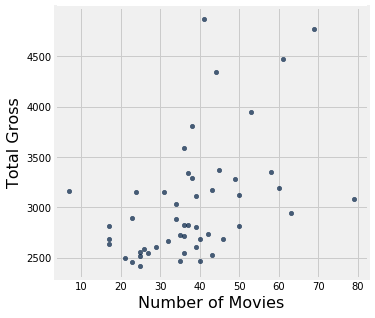

In [3]:
actors.scatter('Number of Movies', 'Total Gross')

## Scatter plots

What is the relationship between `Number of Movies` and `Average per Movie`?

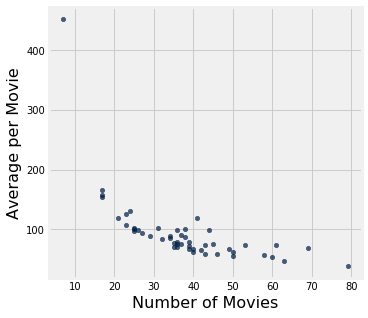

In [4]:
actors.scatter('Number of Movies', 'Average per Movie')

## Two interesting things...

- A *negative* association.
- An outlier.

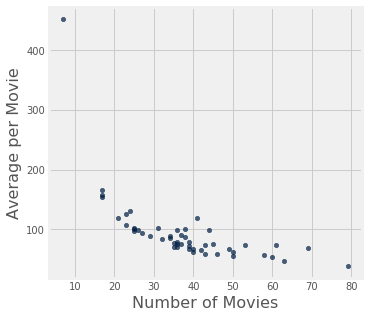


## "Zoom in" to exclude the outlier...

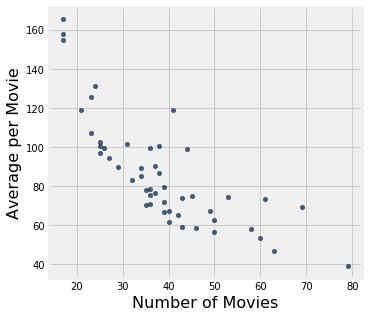

In [5]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

## Who are these people?

In [6]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


## Who is the outlier?

- Made very few, high grossing movies.

In [7]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


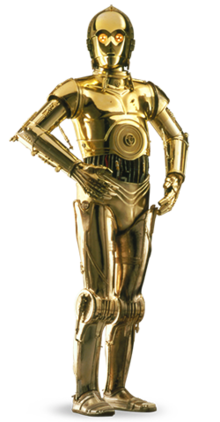

# Line graphs

## More new data: `movies_by_year.csv`

In [8]:
#: read from csv
by_year = Table.read_table('movies_by_year.csv')
by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


|Column|	Content|
|------|-----------|
Year|	Year
Total Gross|	Total domestic box office gross, in millions of dollars, of all movies released
Number of Movies|	Number of movies released
#1 Movie|	Highest grossing movie

## Line graphs

- Visualize trend (often over time).
- `.plot()` method:
    - First argument: column for horizontal axis.
    - Second argument: column for vertical axis.

## Line graphs

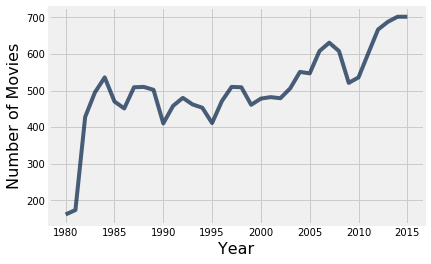

In [9]:
# how has # of movies changed over time?
by_year.plot('Year', 'Number of Movies')

## Line graphs

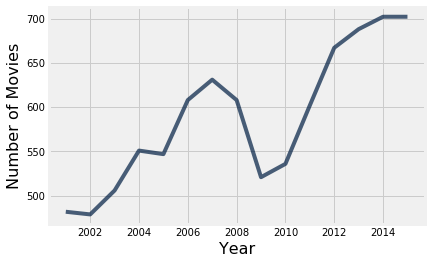

In [10]:
# let's focus on recent years (2000+)
recent = by_year.where('Year', are.above(2000))
recent.plot('Year', 'Number of Movies')

What happened in 2009/2010?

## How did this affect total gross?

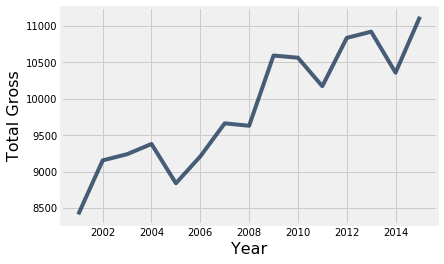

In [11]:
recent.plot('Year', 'Total Gross')

Answer: gross did not noticeably decrease.

## Trivia: was the top movie of 2009?

In [12]:
recent.where('Year', 2009)

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


## Discussion question

What was the top grossing movie of 1989?

    A. Batman
    B. Independence Day
    C. E.T.
    D. Toy Story
    E. Forrest Gump

In [13]:
answers = ['Batman', 'Independence Day', 'E.T.', 'Toy Story', 'Forrest Gump']
by_year.where('#1 Movie', are.contained_in(answers)).sort('Year')

Year,Total Gross,Number of Movies,#1 Movie
1982,3453,428,E.T.
1989,5033.4,502,Batman
1994,5396.2,453,Forrest Gump
1995,5493.5,411,Toy Story
1996,5911.5,471,Independence Day


# Visualizing categorical distributions

Suppose we have a record of ice cream cones sold:

|Flavor|
|------|
|Vanilla|
Chocolate
Chocolate
Vanilla
Strawberry
Chocolate
Chocolate

We want to visualize the *frequency* of each flavor.

## Categorical *distributions*

We write down the frequency of each flavor in a table:

In [14]:
#: the distribution of flavors
flavors = Table(['Flavor', 'Count']).with_rows([
    ['Vanilla', 2],
    ['Chocolate', 4],
    ['Strawberry', 1]
])
flavors

Flavor,Count
Vanilla,2
Chocolate,4
Strawberry,1


## Bar charts

In [15]:
#: import/configure visualization tools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

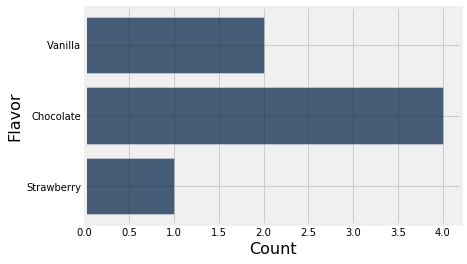

In [16]:
# draw a bar graph
flavors.barh('Flavor')

## Bar charts

- Unlike scatter/line graphs:
    - Height (vertical size) and spacing of bars is arbitrary.
    - Only one numerical variable (horizontal axis)
    - Order of vertical labels doesn't matter

## A (slightly) nicer visualization...

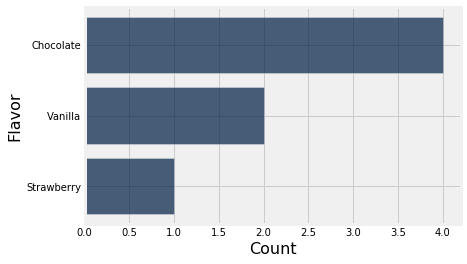

In [17]:
# sort the columns before plotting
flavors.sort('Count', descending=True).barh('Flavor')

## Yet another new data set: `top_movies.csv`

In [18]:
#: read in the csv
top_movies = Table.read_table('top_movies.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


## What is the distribution of studios?

- That is, what is the count of each?
- `.group()` method:
    - First argument: column to group by
    - Counts members in group by default

## Counting movies by studio

In [19]:
by_studio = top_movies.group('Studio')
by_studio

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


## Visualize with a bar chart

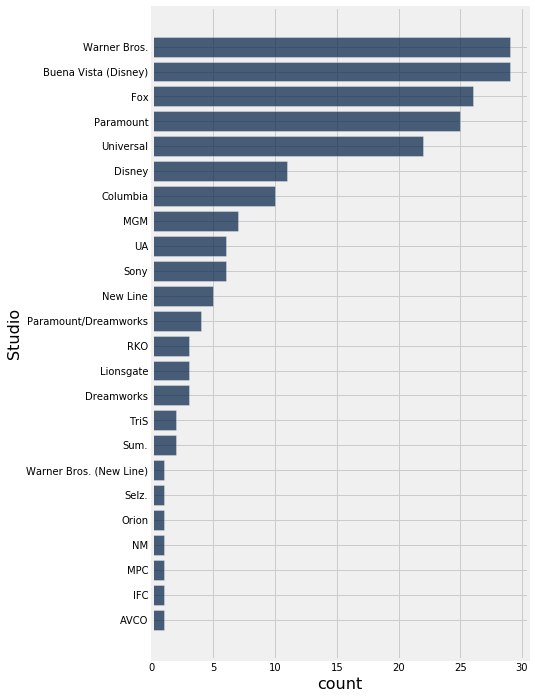

In [20]:
by_studio.sort('count', descending=True).barh('Studio')

## Discussion question

Suppose we run this code. What do we get?


- A) A bar for each movie. Its length is the age of the movie.
- B) A bar for each age. Its length is the # of movies of that age.
- C) A bar for each year. Its length is the age of movies made that year.

In [21]:
# aged = top_movies.with_column("Age", 2017 - top_movies.column('Year'))
# aged.group('Age').barh('Age')

## By the way...

- Used for more than just categorical distributions
- Example: how much did each movie make?

In [ ]:
top_movies.barh('Title', 'Gross')

## Distribution of top movies by year

Some years have multiple top movies:

In [ ]:
top_movies.where('Year', 2010)

## Count of top movies by year

In [ ]:
top_movies.group('Year').barh('Year')

## Observations...

- The bar chart doesn't "space" the years.
- e.g., there is no "gap" between 1921 and 1937.

In [ ]:
#: top movies before 1945
top_movies.where('Year', are.below(1945)).group('Year').barh('Year')

## Is `Year` a categorical or numerical variable?

- Categorical: we can group by it.
- Numerical: we sometimes do arithmetic, and there's a natural order.

## Next time, in DSC 10...

How do we visualize the *distribution* of numerical variables?